# **Figure 7.** Gas velocities
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 11/21/2022          |
| Updated | 11/26/2022          |

## Final snapshot

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


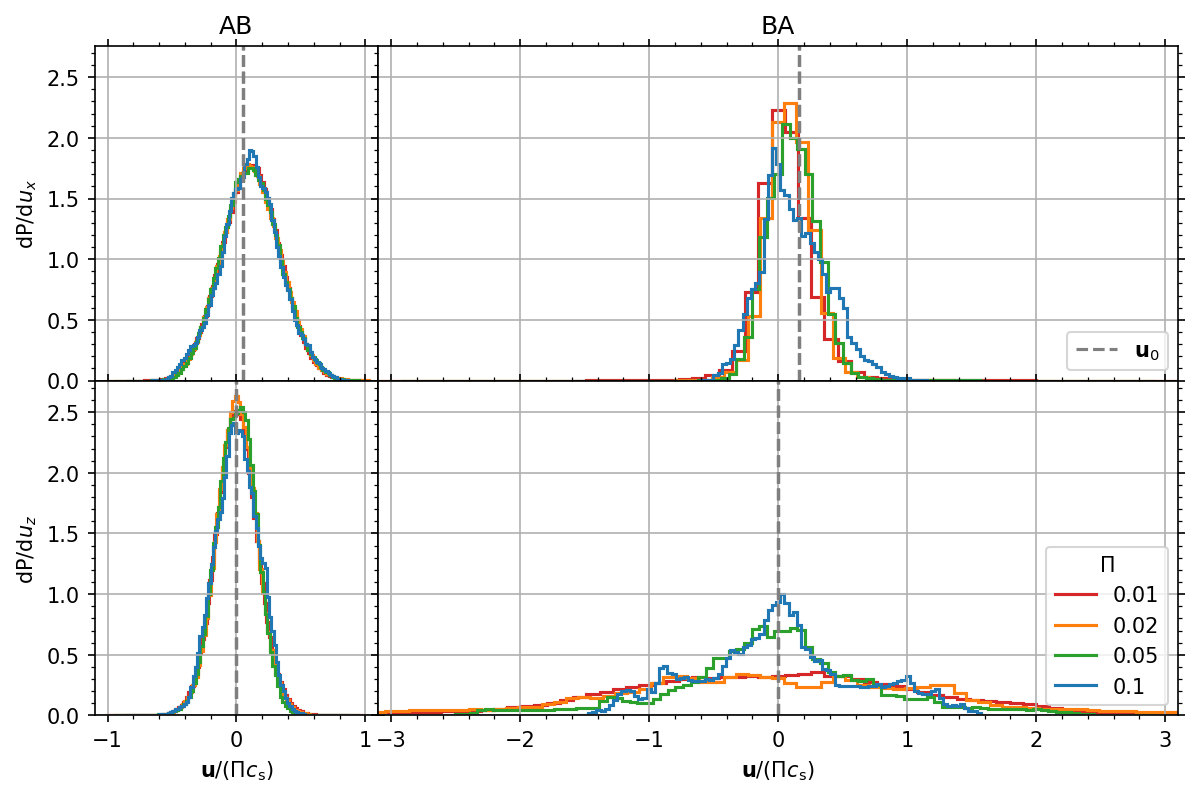

In [31]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey=True, figsize=(9.32, 5.8),
                        width_ratios=[1, 2.82], dpi=150)
workdir = '../unstrat'
cases = [['AB', 100], ['BA', 200]]
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048
bins = 100

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        # print(f'{case}/{Pi[0]}: Processing...', flush=True)
        path = f'{workdir}/{case[0]}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        output = athena_read.athdf(f'{path}/athdf/SI.out1.00{case[1]}.athdf')
        c_s = athinput['hydro']['iso_sound_speed']
        ux0 = hst['1-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        uz0 = hst['2-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        uxs = output['vel1']/float(Pi[0])/c_s
        uzs = output['vel2']/float(Pi[0])/c_s
        rhos = output['rho']
        edge = np.abs(uxs.min())
        if np.abs(uxs.max()) > edge: edge = np.abs(uxs.max())
        if np.abs(uzs.min()) > edge: edge = np.abs(uzs.min())
        if np.abs(uzs.max()) > edge: edge = np.abs(uzs.max())
        bin_edges = np.linspace(-edge, edge, num=bins)

        xhist, bin_edges = np.histogram(uxs, bins=bin_edges, weights=rhos,
                                        density=True)
        # ux_stds, bin_edges, binnumnber = stats.binned_statistic(xhist, xhist,
        #     statistic='std', bins=bin_edges)
        # ux_highs = ux_means + ux_stds
        # ux_lows = ux_means - ux_stds

        zhist, bin_edges = np.histogram(uzs, bins=bin_edges, weights=rhos,
                                        density=True)
        # uz_stds, bin_edges, binnumnber = stats.binned_statistic(zhist, zhist,
        #     statistic='std', bins=bin_edges)
        # uz_highs = uz_means + uz_stds
        # uz_lows = uz_means - uz_stds

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(xhist, bin_edges, color=Pi[1], lw=1.5)
        axs[0][i].axvline(ux0, c='tab:gray', ls='dashed')
        # axs[i].stairs(ux_highs, bin_edges/float(Pi[0]), baseline=ux_lows,
        #               fill=True, color=Pi[1], alpha=0.2)
        axs[1][i].stairs(zhist, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[1][i].axvline(uz0, c='tab:gray', ls='dashed')
        # axs[i].stairs(uz_highs, bin_edges/float(Pi[0]), baseline=uz_lows,
        #               linestyle='dashed', fill=True, color=Pi[1], alpha=0.2)
        # print(f'\tdone.', flush=True)

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$\mathbf{u}_0$')
axs[0][1].legend(loc='lower right')
axs[1][1].legend(loc='lower right', title=r'$\Pi$')
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}u_x$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$\mathbf{u}/(\Pi c_\mathrm{s})$', xlim=(-1.1, 1.1),
              ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$')
axs[1][1].set(xlabel=r'$\mathbf{u}/(\Pi c_\mathrm{s})$', xlim=(-3.1, 3.1))
plt.subplots_adjust(hspace=0, wspace=0)
# plt.savefig(f'figs/gas_velocities.pdf', bbox_inches='tight', pad_inches=0.01)


## Time average

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


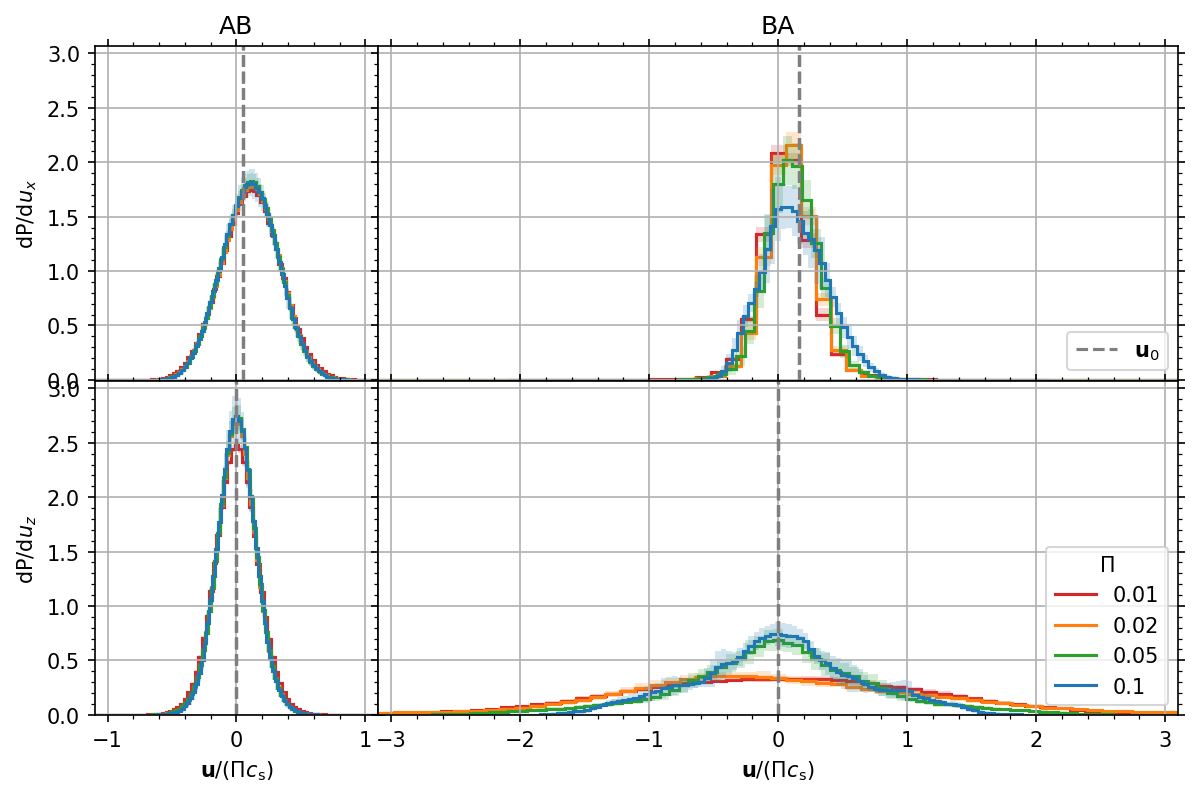

In [52]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey=True, figsize=(9.32, 5.8),
                        width_ratios=[1, 2.82], dpi=150)
workdir = '../unstrat'
cases = [['AB'], ['BA']]
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case[0]}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        ux0 = hst['1-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        uz0 = hst['2-mom'][0]/hst['mass'][0]/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/gas_vel.npz')
        avg_uxs, avg_uzs = npz['avg_uxs'], npz['avg_uzs']
        std_uxs, std_uzs = npz['std_uxs'], npz['std_uzs']
        high_uxs, low_uxs = (avg_uxs + std_uxs), (avg_uxs - std_uxs)
        high_uzs, low_uzs = (avg_uzs + std_uzs), (avg_uzs - std_uzs)
        bin_edges = npz['bin_edges']

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(avg_uxs, bin_edges, color=Pi[1], lw=1.5)
        axs[0][i].stairs(high_uxs, bin_edges, baseline=low_uxs, fill=True,
                         color=Pi[1], alpha=0.2)
        axs[0][i].axvline(ux0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(avg_uzs, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[1][i].stairs(high_uzs, bin_edges, baseline=low_uzs, fill=True,
                         color=Pi[1], alpha=0.2)
        axs[1][i].axvline(uz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$\mathbf{u}_0$')
axs[0][1].legend(loc='lower right')
axs[1][1].legend(loc='lower right', title=r'$\Pi$')
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}u_x$')
axs[0][1].set(title='BA')
axs[1][0].set(xlabel=r'$\mathbf{u}/(\Pi c_\mathrm{s})$', xlim=(-1.1, 1.1),
              ylabel=r'$\mathrm{dP}/\mathrm{d}u_z$')
axs[1][1].set(xlabel=r'$\mathbf{u}/(\Pi c_\mathrm{s})$', xlim=(-3.1, 3.1))
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/gas_velocities.pdf', bbox_inches='tight', pad_inches=0.01)
